# Pràctica 8: Recommeder Systems

#### NOM: Pol Gràcia
#### NIU:  1533358

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Recomenadors No Personalitzats **(20%)**
* B. Recomenadors k-NN **(30%)**
* C. Recomenadors SVD **(50%)**

## Datasets

#### MovieLens-Latest-Small

Farem ús de la base de dades de qualificacions de pel·lícules de [MovieLens](https://grouplens.org/datasets/movielens/). Existeixen varies mides del dataset. Per aprendre'n com funciona la base dels recomenadors, farem servir la versió petita. **Us la heu de descarregar**:

- [Small](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip): 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. (Last updated 9/2018.). [Aqui](https://paperswithcode.com/sota/collaborative-filtering-on-movielens-100k) podeu veure els darrers articles publicats al respecte.

#### MovieLens-Latest
La última versió d'aquesta base de dades, **que no farem servir**, però posem com a referència
- [Full](http://files.grouplens.org/datasets/movielens/ml-latest.zip): 27,000,000 ratings and 1,100,000 tag applications applied to 58,000 movies by 280,000 users. Includes tag genome data with 14 million relevance scores across 1,100 tags. Last updated 9/2018.

#### Netflix Grand-Prize
Teniu una explicació del que va passar a la [wikipedia](https://en.wikipedia.org/wiki/Netflix_Prize). Les dades d'entrenament contenien 100,480,507 ratings that 480,189 users gave to 17,770 movies.

- [challenge 2006-2009](https://www.kaggle.com/netflix-inc/netflix-prize-data)

Com a orientació, les dades actuals de Netflix és de més de 150,000,000 d'usuaris i varis milers películes i sèries de televisió.



## Llibreria

Existeixen moltes llibreries i codis per a realitzar sistemes recomenadors. A continuació us en poso el que farem servir:

#### LensKit Python
- [LKPy](https://github.com/lenskit/lkpy)

Per instal·lar la versió actual, podeu fer servir Anaconda:

`conda install -c lenskit lenskit`

O amb pip:

`pip install lenskit`

#### Altres llibreries interessants
- [Surprise](http://surpriselib.com/) 4.5k stars a github. Molt popular.
- A la web, [paperswithcode](https://paperswithcode.com/), teniu codi actual utilitzat pels darreres grups de recerca en articles científics. Hi trobareu un recopilatori de repositoris i trobareu resumit un ranking dels mètodes per tal d'ajudar a la recerca. En el cas de [recomenadors](https://paperswithcode.com/task/recommendation-systems), podeu veure quina és la tendència actual.





## Introducció

En aquesta pràctica aprendrem sobre sistemes recomenadors, com són les dades, quins mètodes existeixen per a predir qualificacions (ratings) a pel·lícules, fer recomenacions basat en les qualificacions, i veure les diferents formes per evaluar-ho.

Actualment, són sistemes molt utilitzats i gairebé podriem dir que esencials, en diferents sectors online (e.g. YouTube videos, Netflix shows, Amazon products).

Podem veure-hi dues tendències:
<img src="https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png" width="500px">
* **Content filtering**: les recomenacions provenen de descriure el contingut dels items i llavors recomenar items similars.
* **Collaborative filtering**: les recomenacions provenen de l'ús dels items pels clients, és a dir, trobar relacions entre quins items agraden a quins usuaris i recomenar aquells llavors.

També es poden distingir clarament dos tipus de formes d'extreure les qualificacions:
* **Explicit rating**: els usuaris posen nota o qualifiquen les pel·lícules segons el seu gust.
* **Implicit rating**: les qualificacions provenen de l'ús de l'usuari, sense que aquest hagi d'especificar si li agrada o no. És més fàcil d'aconseguir, però no es té un grau de certesa tan gran com en el cas anterior. Un exemple són els clicks en una botiga online, on es solen recomenar nous items segons el nostre historial de visualitzacions.


Per tal de fer-ho més interactiu, us comparteixo un fitxer amb algunes qualificacions meves: `pep-movie-ratings.csv`. El que intentarem és trobar una pel·lícula a veure que ens pugui agradar tan a vosaltres com a mi, per això, el primer que haureu de fer és **omplir la vostra pròpia llista de qualificacions** omplint el fitxe `my-movie-ratings.csv`. 

Els diferents apartats farán ús de diferents tipus de recomenacions:

* El primer apartat aplicarem recomenacions no personalitzades, és a dir, mètodes que no tinguin en compte el que ens agradi a nosaltres, sinó recomenacions genèriques basades amb el que li ha agradat als altres usuaris. Ens servirà com a baseline per si no es coneix res d'algun usuari (per exemple al principi quan es donen d'alta, o veure tendències globals)
  També aprendrem a com evaluar sistemes que tinguin en compte el ranking
* En el següent apartat, aplicarem mètodes de recomenació basats en k-NN. Hi aplicarem mètodes de filtratge colaboratiu User-User i Item-Item.
  <img src="https://miro.medium.com/max/1400/1*QvhetbRjCr1vryTch_2HZQ.jpeg" width="500">
  Aquí aplicarem mètodes que requereixin un aprenentatge sobre dades dels clients als que volem predir.
* Finalment, provarem mètodes basats en la factorització de matrius (SVD). A partir d'aquests, s'han desenvolupat la majories dels mètodes més utilitzats en la actualitat.
  <img src="https://miro.medium.com/max/5130/1*b4M7o7W8bfRRxdMxtFoVBQ.png" width="600">

Començarem descarregant el dataset, descomprimint-lo i [llegint les dades del dataset](https://lkpy.readthedocs.io/en/stable/datasets.html) (el contingut ha de trobar-se a *./ml-latest-small/*)

In [1]:
import lenskit.datasets as ds
import pandas as pd

data = ds.MovieLens('ml-latest-small/')
print("Successfully installed dataset.")

És important entendre com s’estructura un conjunt de dades i assegurar-se que el conjunt de dades s’importa correctament. Imprimim algunes files de les dades de classificació.

Com veieu, MovieLens emmagatzema el número d'identificació d'un usuari (a la primera fila, poques files semblen ser totes les valoracions de l'usuari 1),
 l'identificador de l'element (en aquest cas, cada identificador és una pel·lícula diferent), la qualificació que l'usuari ha donat a aquest element ,
 i un segell de temps per a quan es va deixar la qualificació.

In [2]:
rows_to_show = 10   # <-- Try changing this number to see more rows of data
data.ratings.timestamp = pd.to_datetime(data.ratings.timestamp, unit='s')
data.tags.timestamp = pd.to_datetime(data.tags.timestamp, unit='s')

# display(data.ratings)  # user - item - rating - timestamp
# display(data.movies)   # item - title - genre
# display(data.tags)     # user - item - tag - timestamp
# display(data.links)    # item - id of imdb - id of tmdb

Un aspecte important dels conjunts de dades del sistema de recomanacions és com gestionen les dades que falten.
Els sistemes de recomanació solen tenir MOLTES de dades que falten, perquè la majoria d’usuaris només valoren algunes pel·lícules i la majoria de pel·lícules només reben valoracions d’uns quants usuaris.

Per exemple, podem veure que l’usuari núm. 1 va proporcionar una qualificació de 4.0 a l’element número 1 i
que va proporcionar una qualificació de 4.0 a l’element núm. 3. Però no hi ha cap valoració per a l’element número 2,
cosa que significa que l’usuari núm. 1 mai no l’ha puntuat. És útil saber que aquest conjunt de dades no emmagatzema
cap element sense classificar, en lloc de, per exemple, emmagatzemar elements sense classificar com a 0 valoracions.

Però aquí tenim un altre petit problema: noms com el item 1 i el item 2 no són molt descriptius, de manera que no podem saber quines són aquestes pel·lícules. Afortunadament, MovieLens també té una taula de dades anomenada "movies" que inclou informació sobre títols i gèneres. Podem obtenir una visió més significativa d’aquestes dades unint els dos fitxers de dades.

In [3]:
joined_data = data.ratings.join(data.movies[['title', 'genres']], on='item')
display(joined_data)

,user,item,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi


Ara podem veure els títols i els gèneres de cada ítem.


## A. Recomenadors No Personalitzats (20%)

Ara que tenim puntuacions, creem conjunts genèrics de pel·lícules recomanades per a qualsevol espectador, sense conèixer els seus gustos.


A continuació posarem un exemple, a partir del que podeu crear altres búsquedes sobre el cataleg de pel·licules i ratings.

Algunes funcions de pandas que us poden ajudar:

* per ajuntar taules segons una columna, per exemple un id

  `.join(data.movies[['genres', 'title']], on='item')`


* per fer diferents tipus d'agregacions sobre les dades

  `.agg(count=('user', 'size'), rating=('rating', 'mean'), ..., title=('title', 'first'))`


* per convertir/codificar una columna de text en multiples columnes one-hot

 `.str.get_dummies('|')`


* per ordernar les files

  `.sort_values(by="rating")`
  
  
* per extreue el any del timestamp quan es va fer la qualificació
  
  `df['year_timestamp'] = df['timestamp'].dt.year`
  
* per extreure el any del titol (en cas que hi sigui)

  `df['year'] = df.Book.str.extract('\((\d{4})\)', expand=False)`
  

#### Preguntes

**Explica en cada una de les preguntes si el resultat es l'esperat o no**

1. Escull 5 pel·lícules al atzar i ordenales per puntuació
2. Mostra les 5 pel·lícules amb més puntuació
3. Mostra les 5 pel·lícules amb més quantitat de ratings
4. Mostra les 5 pel·lícules amb més puntuació amb almenys 50 ratings 
5. Mostra (any a any) les pel·lícules amb més puntuació
6. Mostra per categories, les 5 pel·lícules amb més puntuació i almenys 10 ratings
7. Inventa una altra forma de escollir pel·lícules.



#### Respostes

# 1.

In [4]:
display(joined_data.sample(n = 5).sort_values(by = 'rating'))

,user,item,rating,timestamp,title,genres
93716,599,3723,3.0,2018-02-21 17:35:08,Hamlet (1990),Drama
38048,260,3006,4.0,2005-02-26 09:41:33,"Insider, The (1999)",Drama|Thriller
61488,405,6807,4.0,2011-03-23 16:01:34,Monty Python's The Meaning of Life (1983),Comedy
51878,336,3114,4.0,2005-07-24 17:49:07,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
45728,304,1,5.0,1997-12-06 17:12:24,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Al ser random obviament no m'esperava els reusltats, però title i genres tenen sentit.

# 2.

In [5]:
display(joined_data[['title', 'rating']].groupby( by = ['title']).mean().nlargest(5,'rating'))

,rating
title,
'Salem's Lot (2004),5.0
12 Angry Men (1997),5.0
12 Chairs (1976),5.0
20 Million Miles to Earth (1957),5.0
61* (2001),5.0


Si que em sorpren ja que no conec cap de les pel·licules, però suposo que n'hi han bastantes amb un 5 i són les primeres que ha trobat.

# 3.

In [6]:
display(joined_data[['title', 'rating']].groupby(by = ['title']).count().nlargest(5,'rating'))

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


No em sorpren, ja que totes són pel·licules molt bones i segur que molta gent ha fet un rating bo d'aquestes

# 4.

In [7]:
tmp = joined_data[['title', 'rating']].groupby('title', as_index = True).agg(count = ('rating' , 'count') ,mean = ('rating', 'mean'))
display(tmp[tmp['count'] > 50].nlargest(5, 'mean'))

,count,mean
title,,
"Shawshank Redemption, The (1994)",317,4.429022
"Godfather, The (1972)",192,4.289062
Fight Club (1999),218,4.272936
Cool Hand Luke (1967),57,4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),97,4.268041


Amb almenys 50 ratings, ens surt que les pel·licules amb més bon rating són les de la taula superior, i no em sorpren, les conec totes menys les dos últimes que entenc que deuen ser bones pel·licules antigues.

# 5.

In [74]:
gen = joined_data[['title', 'rating']].groupby('title',as_index=False).agg(mean = ('rating', 'mean'), count = ('rating', 'count'))
gen['year'] = joined_data.title.str.extract('\((\d{4})\)', expand=False)
gen.groupby('year', as_index = False).max()

,year,mean,count
0,1902,Rosetta (1999),4.000000
1,1920,Running With Scissors (2006),2.500000
2,1922,Wordplay (2006),4.000000
3,1923,Romy and Michele's High School Reunion (1997),2.965517
4,1926,The Cobbler (2015),3.750000
...,...,...,...
89,2014,White Oleander (2002),5.000000
90,2015,White Sands (1992),5.000000
91,2016,Valley Girl (1983),5.000000
92,2017,Vanya on 42nd Street (1994),5.000000


No em sorprèn, als anys que podem veure en el display surten pel·licules molt famoses.

# 6.

In [9]:
tmp = joined_data[['title', 'rating', 'genres']].groupby(['genres', 'title'], as_index = True).agg(count = ('rating' , 'count') ,mean = ('rating', 'mean'))
tmp[tmp['count'] > 10].nlargest(5,'mean')

count      mean
genres    title                                               
Drama     Secrets & Lies (1996)                   11  4.590909
          Guess Who's Coming to Dinner (1967)     11  4.545455
Drama|War Paths of Glory (1957)                   12  4.541667
Drama     Streetcar Named Desire, A (1951)        20  4.475000
          Celebration, The (Festen) (1998)        12  4.458333

# 7.

Les 10 películes de terror més ben puntuades  (per interés personal).

In [10]:
joined_data[joined_data['genres'] == 'Horror'].groupby('title').agg(rating = ('rating', 'mean')).nlargest(10,'rating')

,rating
title,
Slumber Party Massacre II (1987),5.000000
Slumber Party Massacre III (1990),5.000000
Sorority House Massacre (1986),5.000000
Sorority House Massacre II (1990),5.000000
The Eye: Infinity (2005),5.000000
Vampire in Venice (Nosferatu a Venezia) (Nosferatu in Venice) (1986),5.000000
Children of the Corn IV: The Gathering (1996),4.666667
Dead Meat (2004),4.500000
Oculus (2013),4.500000


## B. Recomenadors k-NN (30%)

Fins ara hem trobat pel·lícules basades en cerques i aplicant filtres al contingut dels items, sense conèixer res dels nostres gustos o dels gustos de la resta d'usuaris que han qualificat una pel·lícula. En aquest apartat, buscarem pel·lícules basant-nos en el historial i les qualificacions dels usuaris, i amb aquest coneixement en traurem les pel·lícules relevants. Per aquest motiu se'n anomenen **filtres colaboratius**.

#### Models
Veurem els models que apareixen a la llibreria de LensKit, i utilitzarem els següents metodes:
* [**Bias**](https://lkpy.readthedocs.io/en/stable/bias.html): Tot i no tractar-se d'un mètode colaboratiu perse, ens pot servir com a baseline. El model bàsic prediu $s$ fent servir $s(u,i) = \mu + b_i + b_u$, on $\mu$ és el score promig de tot el dataset, $b_i$ és el residual promig del item $i$, i  $b_u$ és el bias de usuari, que es calcula com el residual promig de les prediccions del usuari $u$. A la documentació veureu clarament la notació. Veureu que conté un parametre de `damping` (amortiment) que es pot interpretar que està amortint els usuaris i elements amb poca informació cap a una mitjana global en lloc de permetre’ls prendre valors extrems basats en poques valoracions.

* [**ItemItem**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.item_knn): Aquest algorisme agrupa els items similars en funció de les valoracions que els usuaris han fet de elles. Inventat per Amazon el 1998. Està pensat per ser un mètode eficient quan les nostres dades contenen més usuaris que items. Amb més usuaris que elements, cada item sol tenir més puntuacions que cada usuari, de manera que la puntuació mitjana d’un article normalment no canvia tan ràpidament. Això condueix a distribucions de classificació més estables, de manera que no cal reconstruir-lo amb tanta freqüència.

* [**UserUser**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.user_knn): Aquest algorisme agrupa usuaris similars en funció de les seves valoracions de pel·lícules. Té parametres guiant com l'algoritme decideix si un grup concret d'usuaris hauria de ser agrupat mitjançant l'establiment d'una mida de veinatge mínima i màxima. Els clústers realment petits representen grups de persones que no són molt similars a molts altres. Així, mantenint la mida del clúster petit, veurem més recomanacions poc convencionals. Però si augmentem la mida mínima del clúster, probablement es donaran recomanacions més populars convencionalment. Els "millors" valors depenen del que vulguem que es comporti el sistema de recomanació AI. Volem sorprendre amb recomanacions que d’altra manera no sabrien? O busquen una expressió de qualitat més segura?





En aquest apartat farem aquests models explicats a classe per tal de buscar quines pel·lícules ens podràn agradar més a tots dos. Per això, farem ús dels fitxers: `pep-movie-ratings.csv` i `my-movie-ratings.csv` (que l'heu d'omplir amb N qualificacions de pel·lícules que hagueu vist).

In [11]:
pd_pep_movie_ratings = pd.read_csv('pep-movie-ratings.csv', delimiter=";").dropna().set_index("item")
pd_my_movie_ratings = pd.read_csv('my-movie-ratings.csv', delimiter=";").dropna().set_index("item")

In [12]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular

num_recs = 10  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations

popular = Popular() #These two numbers set the minimum (3) and maximum (15) number of neighbors to consider. These are considered "reasonable defaults," but you can experiment with others too
popular = Recommender.adapt(popular)
popular.fit(data.ratings)

print("Set up a Popular algorithm!")

Set up a Popular algorithm!


In [13]:
# Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, 
# while num_recs is how many recommendations it should generate
pep_recs_popular = popular.recommend(-1, 
                                     num_recs, 
                                     ratings=pd_pep_movie_ratings["ratings"]) 

In [14]:
print("POPULAR")
display(pep_recs_popular.join(data.movies[['genres', 'title']], on='item'))


POPULAR


,item,score,genres,title
0,318,317.0,Crime|Drama,"Shawshank Redemption, The (1994)"
1,593,279.0,Crime|Horror|Thriller,"Silence of the Lambs, The (1991)"
2,260,251.0,Action|Adventure|Sci-Fi,Star Wars: Episode IV - A New Hope (1977)
3,589,224.0,Action|Sci-Fi,Terminator 2: Judgment Day (1991)
4,1196,211.0,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...
5,2858,204.0,Drama|Romance,American Beauty (1999)
6,47,203.0,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
7,780,202.0,Action|Adventure|Sci-Fi|Thriller,Independence Day (a.k.a. ID4) (1996)
8,150,201.0,Adventure|Drama|IMAX,Apollo 13 (1995)
9,4993,198.0,Adventure|Fantasy,"Lord of the Rings: The Fellowship of the Ring,..."


#### Preguntes

1. Instancia i aprèn els models Populars, Bias, ItemItem-knn i UserUser-knn. Explica els parametres que tenen aquests models.
2. Llegeix la base de dades `pep-movie-ratings.csv` i `my-movie-ratings.csv` (recorda a omplir aquest últim)
3. Fés prediccions amb el teu perfil d'usuari amb els models anteriors. Modifica els parametres i mostra quina influència tenen sobre els resultats. 
4. Fés 10 prediccions amb cada un dels mètodes. Apareixen pel·lícules en comú?
5. Com podriem fer per obtenir recomenacions conjuntes?

#### Respostes

# 1.

El model Bias té els parametres: items - si computa item bias, users - si computa user bias, damping - damping bayesia per aplicar als bias calculats.

El model ItemItem nnbrs - maxim de veins per fer l'score de cada element, min_sim - minima similaritat threshold per considerar algo un vei, save_nbrs - nombre de veins per guardar en el model entrenat, center- si normalitzar els vectors de rate, aggregate- quin tipus d'agregació utilitzar.

El model UserUser nnbrs - maxim de veins per fer l'score de cada element, min_sim - minima similaritat threshold per considerar algo un vei,  center- si normalitzar els vectors de rate, aggregate- quin tipus d'agregació utilitzar.

In [15]:
from lenskit.algorithms.bias import Bias
from lenskit.algorithms.item_knn import ItemItem
from lenskit.algorithms.user_knn import UserUser
P_m = Popular()
B_m = Bias()
I_m = ItemItem(nnbrs = 10)
U_m = UserUser(nnbrs = 10)

# 2.

In [16]:
import random
Pep_r = pd.read_csv('pep-movie-ratings.csv', delimiter = ';')
My_r = pd.read_csv('my-movie-ratings.csv', delimiter= ';')
l =  [random.uniform(0, 5) for n in range(len(My_r))]
My_r['ratings'] = l
display(My_r)

,item,title,genres,ratings
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1.036838
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.397360
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2.070167
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1.601806
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,3.289737
...,...,...,...,...
995,1476,Private Parts (1997),Comedy|Drama,0.830979
996,1235,Harold and Maude (1971),Comedy|Drama|Romance,2.743702
997,916,Roman Holiday (1953),Comedy|Drama|Romance,4.129539
998,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,4.564966


# 3.



No he pogut provar cadascun dels models amb diferents paràmetres ni mostrar amb gràfiques com afecta als scores i a les puntuacions, ja que no tinc temps. Disculpa.

In [17]:
num_recs = 10


### Popular Model

In [18]:
popular = Popular() 
popular = Recommender.adapt(popular)
popular.fit(data.ratings)
my_recs_popular = popular.recommend(-1, 
                                     num_recs, 
                                     ratings=My_r["ratings"]) 

p_res = my_recs_popular.join(data.movies[['genres', 'title']], on='item')
display(p_res)

,item,score,genres,title
0,2571,278.0,Action|Sci-Fi|Thriller,"Matrix, The (1999)"
1,2959,218.0,Action|Crime|Drama|Thriller,Fight Club (1999)
2,1196,211.0,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...
3,2858,204.0,Drama|Romance,American Beauty (1999)
4,1198,200.0,Action|Adventure,Raiders of the Lost Ark (Indiana Jones and the...
5,4993,198.0,Adventure|Fantasy,"Lord of the Rings: The Fellowship of the Ring,..."
6,1210,196.0,Action|Adventure|Sci-Fi,Star Wars: Episode VI - Return of the Jedi (1983)
7,2028,188.0,Action|Drama|War,Saving Private Ryan (1998)
8,5952,188.0,Adventure|Fantasy,"Lord of the Rings: The Two Towers, The (2002)"
9,7153,185.0,Action|Adventure|Drama|Fantasy,"Lord of the Rings: The Return of the King, The..."


### Bias Model

In [19]:
B_m = Bias()
B_m = Recommender.adapt(B_m)
B_m.fit(data.ratings)
my_recs_bias = B_m.recommend(-1, 
                                     num_recs, 
                                     ratings=My_r["ratings"]) 

b_res = my_recs_bias.join(data.movies[['genres', 'title']], on='item')
display(b_res)

,item,score,genres,title
0,1140,4.303349,Drama,Entertaining Angels: The Dorothy Day Story (1996)
1,1151,4.303349,Animation|Comedy|Drama|Fantasy,Lesson Faust (1994)
2,1310,4.303349,Documentary,Hype! (1996)
3,1349,4.303349,Horror,Vampire in Venice (Nosferatu a Venezia) (Nosfe...
4,1631,4.303349,Action|Thriller,"Assignment, The (1997)"
5,1759,4.303349,Drama,"Four Days in September (O Que É Isso, Companhe..."
6,2075,4.303349,Drama|War,Mephisto (1981)
7,2196,4.303349,Action,Knock Off (1998)
8,2512,4.303349,Drama,"Ballad of Narayama, The (Narayama bushiko) (1983)"
9,2824,4.303349,Documentary|Drama,On the Ropes (1999)


### ItemItem Model

In [20]:
I_m = ItemItem(nnbrs=10)
I_m = Recommender.adapt(I_m)
I_m.fit(data.ratings)
my_recs_itemitem = I_m.recommend(-1, 
                                     num_recs, 
                                     ratings=My_r["ratings"]) 


ii_res = my_recs_itemitem.join(data.movies[['genres', 'title']], on='item')
display(ii_res)

,item,score,genres,title
0,3068,5.052016,Drama|Mystery,"Verdict, The (1982)"
1,55167,4.962367,Action|Adventure|Animation|Crime|Fantasy,Tekkonkinkreet (Tekkon kinkurîto) (2006)
2,147376,4.958011,Sci-Fi,Doctor Who: A Christmas Carol (2010)
3,115122,4.935802,Comedy|Horror,What We Do in the Shadows (2014)
4,171495,4.837367,(no genres listed),Cosmos
5,6791,4.737367,Drama,Babette's Feast (Babettes gæstebud) (1987)
6,98491,4.729193,Animation|Comedy|Romance,Paperman (2012)
7,168252,4.713694,Action|Sci-Fi,Logan (2017)
8,27397,4.650017,Crime|Drama|Mystery|Thriller|War,Joint Security Area (Gongdong gyeongbi guyeok ...
9,7767,4.629310,Drama,"Best of Youth, The (La meglio gioventù) (2003)"


### UserUser Model

In [21]:
U_m = UserUser(nnbrs=10)
U_m = Recommender.adapt(U_m)
U_m.fit(data.ratings)
my_recs_useruser = U_m.recommend(-1, 
                                     num_recs, 
                                     ratings=My_r["ratings"]) 

uu_res = my_recs_useruser.join(data.movies[['genres', 'title']], on='item')
display(uu_res)
 

,item,score,genres,title
0,5181,5.125191,Action|Sci-Fi|Thriller,Hangar 18 (1980)
1,5746,5.125191,Action|Horror|Mystery|Sci-Fi,Galaxy of Terror (Quest) (1981)
2,5919,5.125191,Sci-Fi,Android (1982)
3,6835,5.125191,Action|Horror|Sci-Fi,Alien Contamination (1980)
4,2314,4.852851,Drama,Beloved (1998)
5,4055,4.852851,Drama,Panic (2000)
6,6591,4.852851,Drama,"Magdalene Sisters, The (2002)"
7,5490,4.713717,Action|Comedy,The Big Bus (1976)
8,5915,4.713717,Action|Drama|War,Victory (a.k.a. Escape to Victory) (1981)
9,132333,4.713717,Documentary|Drama,Seve (2014)


# 4.

Mirem de les taules superiors si tenim algun dels títols en més d'un model.

In [22]:
trobat = False
for a,b,c,d in zip(p_res['title'],b_res['title'],ii_res['title'],uu_res['title']):
    if a in list(b_res['title']) or a in list(ii_res['title']) or a in list(uu_res['title']):
        print(a, 'Està a més de una taula')
        trobat = True
    elif b in list(p_res['title']) or b in list(ii_res['title']) or b in list(uu_res['title']):
        print(b, 'Està a més de una taula')
        trobat = True
    elif c in list(b_res['title']) or c in list(p_res['title']) or c in list(uu_res['title']):
        print(c, 'Està a més de una taula')
        trobat = True
    elif d in list(b_res['title']) or d in list(ii_res['title']) or d in list(p_res['title']):
        print(d, 'Està a més de una taula')
        trobat = True
        
if not trobat:
    print('No hi han pel·licules en comú en cap de les recomenacions de 10 pelicules de cada model.')

No hi han pel·licules en comú en cap de les recomenacions de 10 pelicules de cada model.




# 5.

Per obtenir recomenacions conjuntes, jo probablement faria en primer unes recomenacions utilitzant el popular model, perquè en primera instància veiem en gloal quines pelicules agraden més, i a continuació probablement faria algun tipus d'estadístic entre la BBDD i les puntuacions que agradin més: per exemple una organització de les dades d'estil gaussià i sobre aquestes dades fer un useruser o un itemitem amb els mues ratings. 

Així doncs, faria algun tipus de primera predicció, amb la qual modificaria la meva bbdd i sobre aquesta nova bbdd faria el meu model recomenador per a mi.

## C. Recomenadors SVD (50%)

En aquest últim apartat, veurem com evaluar aquests models. A més, també instanciarem una de les families de recomenadors més utilitzats en l'actualitat.

#### Models

Al setembre del 2009, [Netflix va atorgar un premi de 1.000.000 de dòlars](https://en.wikipedia.org/wiki/Netflix_Prize) a un equip que havia desenvolupat un algorisme que millorava les prediccions de qualificació en més d’un 10%. El tercer lloc va quedar en una entrada individual de Simon Funk - FunkSVD.

Tenint en compte la matriu de valoracions dels usuaris a diferents pel·lícules, l'objectiu final és omplir les valoracions desconegudes amb prediccions, de manera que puguem agafar la màxima d'aquestes prediccions com a recomanacions. 

Aquest mètodes ho aconsegueixen mitjançant la introducció d’un conjunt d’entitats intermediàries conegudes com a factors latents, que són apresos automàticament. Per entendre-ho millor, podem pensar que són propietats dels items que poden agradar o no als usuaris: cada factor latent és un nou atribut per valorar una pel·lícula. Per exemple, una pel·lícula pot ser més dramàtica o menys, més graciosa o gens, més llarga o curta, amb actors coneguts o desconeguts.. I cada una d'elles pot influir en la valoració d’un usuari positiva o negativament. Tenint en compte aquestes informacions, es podrà reconstruir la matriu *completa* de valoracions dels usuaris i restaurants mitjançant la multiplicació de matrius. En el següent enllaç teniu una explicació detallada del mètode [funksvd](https://towardsdatascience.com/personalised-restaurant-recommendations-using-funksvd-3beff200b01c).

Farem servir aquests models:

* [**FunkSVD**](https://lkpy.readthedocs.io/en/stable/mf.html#funksvd): FunkSVD és un tipus de factorització de matrius com SVD que utilitza un descens de gradient estocàstic, per entrenar les matrius de característiques d'usuari i la matriu de característiques de matrius. En general, no es recomana utilitzar-lo en aplicacions o experiments nous; els algoritmes basats en ALS (mínims quadrats alternats) són menys sensibles als hiperparàmetres i actualment amb TensorFlow proporcionen un entrenament del descens de gradient més optimitzada del mateix model de predicció.

* [**BiasedMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.BiasedMF): factorització de matriu esbiaixada entrenada amb mínims quadrats alternats. Es tracta d’un algorisme orientat a la predicció adequat per a dades amb feedback explícites (ratings).

* [**ImplicitMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.ImplicitMF): factorització de matriu implícita entrenada amb mínims quadrats alternats. Aquest algorisme genera "prediccions", però no són a una escala significativa. Si les seves dades d'entrada contenen valors de classificació, s'utilitzaran com a valors de "confiança"; en cas contrari, la confiança serà 1 per cada article classificat.


#### Crossvalidació
La crossvalidació també té aspectes interessants, ja que no només s'han de separar els conjunts d'entrenament i test per usuaris (en comptes que únicament per qualificacions), sinó que també es pot tenir en compte el eix temporal, ja que les prediccions i els gustos dels usuaris solen cambiar, evolucionar amb el temps, així que les darreres qualificacions tenen més importancia que les primeres. En aquesta llibreria tenim les dues opcions:
* [**row-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#row-based-splitting): seria el cas comú en classificació. Es separen els exemples aleatoriament en conjunts d'entrenament i de test.
* [**user-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#user-based-splitting): seria el més adient. Els passos que segueix son els següents:
  * Particiona el conjunt d'identificadors d'usuari en $n$ conjunts d'usuaris de test (cada $n$ representa un fold)
  * Ara bé, no es selecciona tot un usuari com a test, sino que **només es selecciona un conjunt de files** d'aquests usuaris de test per convertir-se en les files de test real. Es pot escollir (entre d'altres) amb els mètodes `SampleFrac()` o bé `LastFrac()` si es volen agafar els exemples aleatoriament o els darrers valorats.  
  * Finalment, les dades que no són seleccionades com a test, es converteixen en conjunt d'entrenament (per cada un dels folds).





#### Evaluació
Finalment, veurem com l'evaluació també té les seves pròpies mètriques, el que també el converteix en un problema interessant No només volem predir correctament la valoració d'un usuari per una pel·lícula en concret, sinó que voldriem aconseguir que el resultat obtingut segueixi un ranking de més a menys rellevants. A ningú li agrada fer scrolling per trobar les millors recomenacions (o buscar a les següents pagines de google per trobar un resultat satisfactori). 

Per aquest motiu, analitzarem quines mètriques existeixen per tal d'evaluar el rendiment del sistema.

Mètriques de regressió:
* [**MAE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.mae) (Mean Absolute Error) Calcula la distància entre la predicció i el valor del groundtruth en termes absoluts.
* [**RMSE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.rmse) (Root Mean Squared Error). Calcula l'arrel de les distàncies dels errors al quadrat. Aquesta mètrica té algunes implicacions interessants. Atès que els errors es computen al quadrat abans que es faci la mitjana, la RMSE dóna un pes relativament elevat als grans errors. Això significa que el RMSE hauria de ser més útil quan els errors grans són particularment indesitjables.

Mètriques de classificació:
* [**TopN-Precisio**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.precision) Per cada usuari, s'ordenen les mostres de test segons el score de predicció i s'agafen les top N. Aquestes top, serien les recomenacions. Amb aquesta mètrica es calcula la precisió del model per l'usuari (quantes de les recomenacions fetes són bones recomenacions).
* [**TopN-Recall**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.recall) Similar al anterior, però calculant el recall de les recomenacions (del total de exemples de test que poden ser positius, quantes de elles les ha recomenat el model).

Mètriques de ranking:
* **MRR** (Mean Reciprocal Rank). Comptabilitza en quina posició es troba la primera recomenació correcta. Funciona pel cas binari.
* **MAP** (Mean Average Precision). Té en compte el ranking de la classificació, però només funciona pel cas binari (per exemple, qualificacions implícites), però és complicat evaluar qualificacions explícites.
* [**NDCG**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.ndcg) (Normalized Discounted Cumulative Gain). Pot utilitzar el fet que alguns documents són "més" rellevants que d'altres. Els ítems més rellevants haurien de ser mostrats abans que els menys rellevants, i aquests per davant que els ítems no rellevants.

Una bona explicació dels pros i contres d'aquestes mètriques la podem trobar en aquest [enllaç](https://link.medium.com/8DbsYzhNCbb).



#### Definir experiment

In [23]:
from lenskit.algorithms import Recommender, basic
from lenskit import batch, topn, util
import numpy as np

def experiment(name, algo, train, test, n=20):
    fittable = util.clone(algo)   # alguns metodes fallen al fet fit varis cops.. aixi funciona
    
    base = basic.Bias(damping=25)  # si el metode algo no pot predir alguna qualificació, agafa aquesta per defecte 
    fittable = basic.Fallback(fittable, base)

    fittable = Recommender.adapt(fittable)   # de vegades no tots els algorismes tenen recomenadors (només predictors, aixi agafa el per defecte)

    fittable.fit(train)
    preds = batch.predict(fittable, test)
    
    users = test.user.unique()               # agafem els users de test per donar recomenacions
    recs = batch.recommend(fittable, users, n)

    # add the algorithm name for analyzability
    recs['Algorithm'] = name
    preds['Algorithm'] = name
    return recs, preds


#### Crossvalidació

In [24]:
from lenskit import crossfold as xf
import lenskit.util
from tqdm import tqdm
import sys

def crossvalidar(ratings, models, splitting, metriques, n_partitions=5, n_recomenacions=10):
    rnd = lenskit.util.rng(24)
    
    if splitting == "row":
        folds = xf.partition_rows(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, rng_spec=rnd)       
    elif splitting == "user":
        n_test = xf.SampleFrac(0.2) # 20% of the ratings of the users from the test-fold
        folds = xf.partition_users(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, n_test, rng_spec=rnd)
    else:
        raise("Splitting not known")
    
    all_recs = []
    all_preds = []
    test_data = []
    
    print("CROSSVALIDATION")
    print("Data: {}".format(ratings.shape))
    print("Models: {}".format(list(models.keys())))
    print("Splitting: {}".format(splitting))
    print("Metrics: {}".format([m.__name__ for m in metriques]))
    sys.stdout.flush()
    
    for i, (train, test) in enumerate(folds):
        tqdm_inner_loop = tqdm(models, desc='[fold {} of {}]'.format(i+1, n_partitions))
        for model_name in tqdm_inner_loop:
            tqdm_inner_loop.set_postfix({"model": model_name, "train": train.shape[0], "test": test.shape[0]})
            recs, preds = experiment(model_name, models[model_name], train, test, n=n_recomenacions)
            all_recs.append(recs)
            all_preds.append(preds)
        test_data.append(test)

    all_recs = pd.concat(all_recs, ignore_index=True)
    all_preds = pd.concat(all_preds, ignore_index=True)
    test_data = pd.concat(test_data, ignore_index=True)
    
    all_preds = all_preds.merge(test_data[["user",
                                           "item", 
                                           "rating"]].rename(columns={"rating":"true_label"}), 
                                on=["user","item"])
        
    results_predict = []
    rla = topn.RecListAnalysis()
    for m in metriques:
        if "topn" in m.__module__:
            rla.add_metric(m)

    results = rla.compute(all_recs, test_data)
    
    for m in metriques:
        if "predict" in m.__module__:
            res = all_preds.groupby(['Algorithm','user']).apply(lambda df: m(df["prediction"], df["true_label"]))
            results[m.__name__] = res

    return results


#### Instanciar models

In [25]:
from lenskit.algorithms import item_knn, user_knn, als, basic, bias, funksvd

models = {
    "funcksvd": funksvd.FunkSVD(200),
    "BiasedMF": als.BiasedMF(200),
    "ImplicitMF": als.ImplicitMF(200),
    "ItemItem": item_knn.ItemItem(7),
    "UserUser":user_knn.UserUser(7),
    "Bias": bias.Bias()
}

#### Definir mètriques

In [26]:
from lenskit import topn
from lenskit.metrics import predict

metriques = [
    predict.mae,
    predict.rmse,
    topn.precision,
    topn.recall,
    topn.recip_rank,
    topn.ndcg
]


#### Definir splitting method

In [27]:
splitting = "user"
#splitting = "row"

#### Executar experiment

In [ ]:
results = crossvalidar(data.ratings, models, splitting, metriques)

CROSSVALIDATION
Data: (100836, 4)
Models: ['funcksvd', 'BiasedMF', 'ImplicitMF', 'ItemItem', 'UserUser', 'Bias']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']


[fold 1 of 5]:  17%|█▋        | 1/6 [00:24<02:00, 24.13s/it, model=BiasedMF, train=96367, test=4469]

In [29]:
results.groupby("Algorithm").mean()

,user,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,,
Bias,305.5,10.0,0.000492,0.000084,0.000580,0.000088,0.692105,0.855084
BiasedMF,305.5,10.0,0.049016,0.023332,0.140916,0.033605,0.698400,0.864130
ImplicitMF,305.5,10.0,0.268033,0.165140,0.522540,0.190567,3.257966,3.395087
ItemItem,305.5,10.0,0.001639,0.000109,0.004463,0.000260,0.681916,0.847851
UserUser,305.5,10.0,0.000492,0.000058,0.001189,0.000131,0.713281,0.882799
funcksvd,305.5,10.0,0.000164,0.000022,0.001639,0.000076,0.686278,0.846861


#### Preguntes

1. Fes una taula de resum que compari els diferents algoritmes (parametres per defecte) vistos per les diferents mètriques. La taula ha de contenir almenys 6 mètodes diferents i les 6 mètriques explicades.
2. Compara els resultats tenint en compte el split de rows o el de usuaris. Quin dels dos dona uns resultats millors? Per què?
3. Com afecta el parametre de n_recomenacions en la precisió i el recall? Fés una gràfica mostrant els resultats
4. Busca quins parametres afecten a cada model, i intenta optimitzar-ne els resultats. Guarda la taula inicial i compara finalment la millora aconseguida en una 3a taula on hi mostris el percentatge de millora.


### Important

Gonzalo, el meu ordinador és antic i té una capacitat computacional baixa, i m'ha estat impossible executar-ho. Es quedava enganxat al 17% del primer fold durant 2 hores. Vaig demanar als meus companys si siusplau em podien passar la taula resultat per poder treballar sobre ella. Sé el que havia de fer i com ho havia de fer, l'únic que em no podia calcular el crossvalidar i menys per l'apartat 3, modificant la n. Espero que ho entenguis.

Obviament, cal remarcar que no m'han passat el codi, senzillament les taules resultat per poder treballarhi jo, i per al primer i el segon apartat, els hi he demanat que m'executessin el codi tal i com el tinc jo.

#### Respostes

# 1.

In [31]:
results.groupby('Algorithm').mean()

,user,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,,
Bias,305.5,10.0,0.000492,0.000084,0.000580,0.000088,0.692105,0.855084
BiasedMF,305.5,10.0,0.049016,0.023332,0.140916,0.033605,0.698400,0.864130
ImplicitMF,305.5,10.0,0.268033,0.165140,0.522540,0.190567,3.257966,3.395087
ItemItem,305.5,10.0,0.001639,0.000109,0.004463,0.000260,0.681916,0.847851
UserUser,305.5,10.0,0.000492,0.000058,0.001189,0.000131,0.713281,0.882799
funcksvd,305.5,10.0,0.000164,0.000022,0.001639,0.000076,0.686278,0.846861


# 2.

In [33]:
splitting = "row"
results2 = crossvalidar(data.ratings, models, splitting, metriques )
results2.groupby("Algorithm").mean()

,user,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,,
Bias,305.5,49.967213,0.000721,0.000335,0.002154,0.000374,0.711768,0.896681
BiasedMF,305.5,49.967213,0.053844,0.025717,0.174243,0.032010,0.709856,0.899704
ImplicitMF,305.5,49.967213,0.254451,0.148677,0.486508,0.157348,3.283481,3.436237
ItemItem,305.5,49.967213,0.001967,0.000447,0.006595,0.000532,0.699510,0.890285
UserUser,305.5,49.967213,0.000787,0.000260,0.004191,0.000284,0.721881,0.918530
funcksvd,305.5,49.967213,0.000361,0.000037,0.003087,0.000090,0.706410,0.888496


# 3.

In [ ]:
r20 = crossvalidar(data.ratings, models, splitting, metriques, 5, 20 )
r40 = crossvalidar(data.ratings, models, splitting, metriques, 5, 40 )
r60 = crossvalidar(data.ratings, models, splitting, metriques,5, 60 )
r100 = crossvalidar(data.ratings, models, splitting, metriques, 5, 100 )

In [63]:
lis = [results.groupby("Algorithm", as_index = False).mean(), r20.groupby("Algorithm", as_index = False).mean()\
       , r40.groupby("Algorithm",as_index = False).mean(), r60.groupby("Algorithm",as_index = False).mean(), r100.groupby("Algorithm", as_index = False).mean()]
res = pd.concat(lis).sort_values(by = 'nrecs')

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

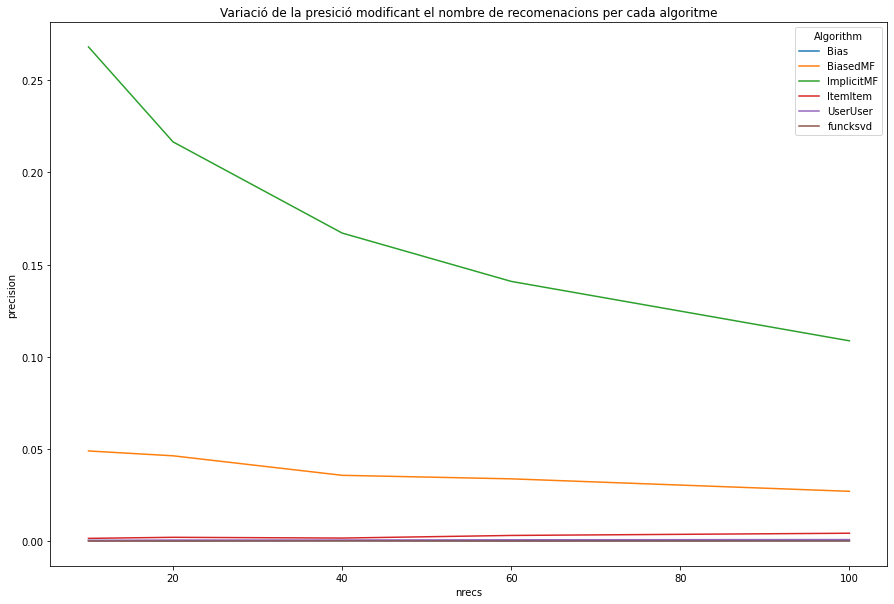

In [65]:
plt.figure(figsize = (15,10))
plt.title('Variació de la presició modificant el nombre de recomenacions per cada algoritme')
g = sns.lineplot(data = res, x = 'nrecs', y = 'precision', hue = 'Algorithm')

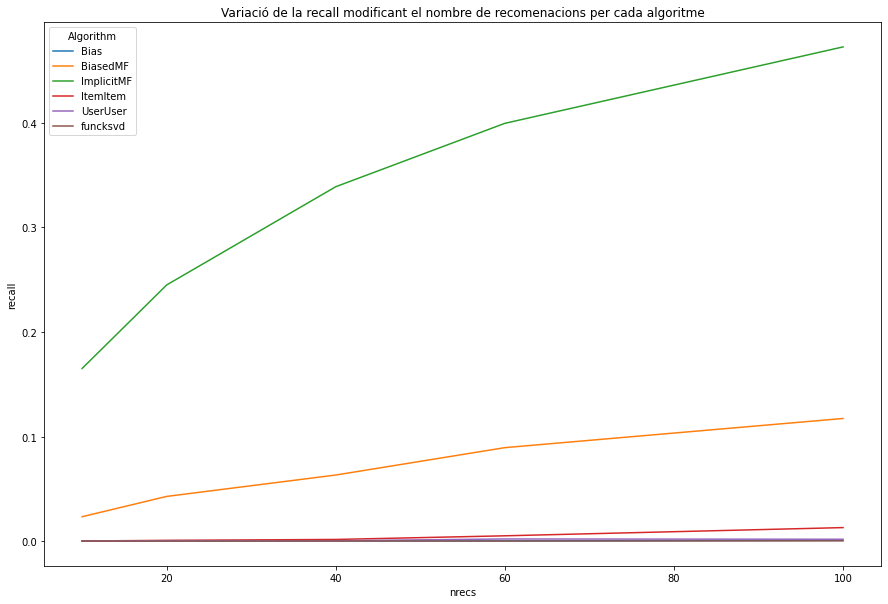

In [66]:
plt.figure(figsize = (15,10))
plt.title('Variació de la recall modificant el nombre de recomenacions per cada algoritme')
g = sns.lineplot(data = res, x = 'nrecs', y = 'recall', hue = 'Algorithm')

Analitzant les dos gràfiques, en primer lloc el que veiem es que tant la presition com el recall són notablement petits.

A més a més, veiem que la presition disminueix a mesura que augmentem les recomenacions a cada usuari, mentres que el recall augmenta a mesura que augmentem les recomenacions.